In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def to_grayscale(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

def threshold(image, thresh_value=128):
    binary_image = np.zeros_like(image)
    binary_image[image > thresh_value] = 255
    return binary_image

def create_white_kernel(size=500):
    return np.ones((size, size), dtype=np.uint8) * 255

def match_kernel_optimized(image, kernel, threshold=0.9, step_size=20):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result = []

    for y in range(0, image_height - kernel_height + 1, step_size):
        for x in range(0, image_width - kernel_width + 1, step_size):
            region = image[y:y + kernel_height, x:x + kernel_width]
            match = np.sum(region == kernel) / (kernel_height * kernel_width)
            if match >= threshold:
                result.append((x, y))

    return result

def draw_rectangle(image, top_left, width, height, color=(0, 255, 0)):
    x, y = top_left
    image[y, x:x + width] = color
    image[y + height - 1, x:x + width] = color
    image[y:y + height, x] = color
    image[y:y + height, x + width - 1] = color
    return image

def draw_red_dot(image, center, radius=5, color=(0, 0, 255)):
    x, y = center
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            if i**2 + j**2 <= radius**2:
                if 0 <= y + i < image.shape[0] and 0 <= x + j < image.shape[1]:
                    image[y + i, x + j] = color
    return image


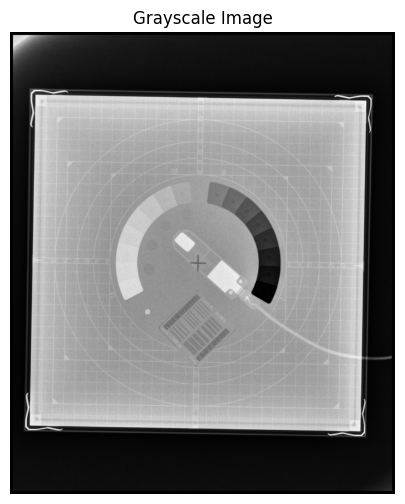

In [2]:
input_image_path = r"PNG\0.8mAs.png"
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Could not read the image. Please check the path and filename.")
else:
    grayscale_image = to_grayscale(input_image)

    plt.figure(figsize=(6, 6))
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()


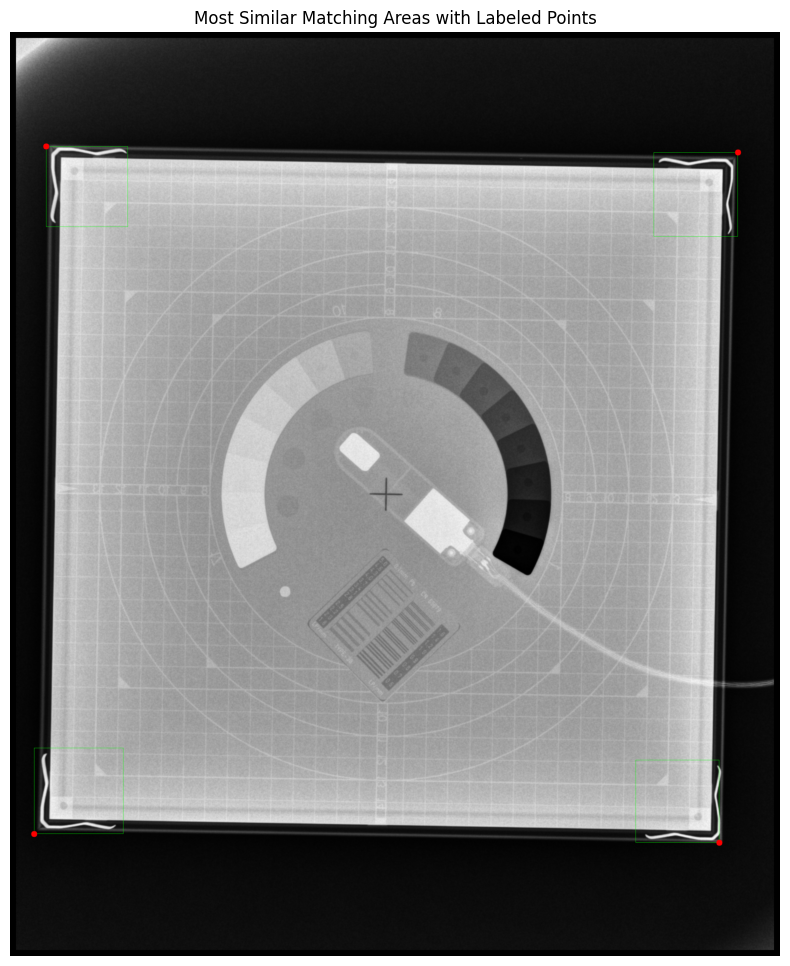

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to threshold the grayscale image
def threshold(image, thresh_value=128):
    binary_image = np.zeros_like(image)
    binary_image[image > thresh_value] = 255
    return binary_image

# Function to draw rectangles manually
def draw_rectangle(image, top_left, width, height, color=(0, 255, 0)):
    x, y = top_left
    image[y, x:x + width] = color
    image[y + height - 1, x:x + width] = color
    image[y:y + height, x] = color
    image[y:y + height, x + width - 1] = color
    return image

# Function to draw a red dot
def draw_red_dot(image, center, radius=5, color=(0, 0, 255)):
    x, y = center
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            if i**2 + j**2 <= radius**2:
                if 0 <= y + i < image.shape[0] and 0 <= x + j < image.shape[1]:
                    image[y + i, x + j] = color
    return image

# Load the input image
input_image_path = r"PNG\0.8mAs.png"
input_image = cv2.imread(input_image_path)

# List of kernel images with their descriptive names
kernel_images_info = [
    ("Left_Top_KERNEL.png", "top_left"),
    ("Right_Top_KERNEL.png", "top_right"),
    ("Left_Bottom_KERNEL.png", "bottom_left"),
    ("Right_Bottom_KERNEL.png", "bottom_right")
]

# Convert the input image to grayscale and threshold it
if input_image is None:
    print("Error: Could not read the input image. Please check the path and filename.")
else:
    grayscale_image = np.dot(input_image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    threshold_value = 128
    binary_image = threshold(grayscale_image, thresh_value=threshold_value)

    # Iterate through each kernel image and perform matching
    output_image = input_image.copy()
    for kernel_image_path, position_type in kernel_images_info:
        kernel_image = cv2.imread(kernel_image_path, cv2.IMREAD_GRAYSCALE)

        if kernel_image is None:
            print(f"Error: Could not read kernel image {kernel_image_path}.")
            continue

        template_height, template_width = kernel_image.shape
        max_similarity = -1
        best_match_position = (0, 0)

        # Sliding window to find the best match with highest similarity
        step_size = 20
        for y in range(0, binary_image.shape[0] - template_height + 1, step_size):
            for x in range(0, binary_image.shape[1] - template_width + 1, step_size):
                region = binary_image[y:y + template_height, x:x + template_width]
                match_score = np.sum(region == kernel_image) / (template_height * template_width)

                if match_score > max_similarity:
                    max_similarity = match_score
                    best_match_position = (x, y)

        # Determine the specific point based on kernel type
        if position_type == "top_left":
            point = best_match_position  # top-left corner
        elif position_type == "top_right":
            point = (best_match_position[0] + template_width, best_match_position[1])  # top-right corner
        elif position_type == "bottom_left":
            point = (best_match_position[0], best_match_position[1] + template_height)  # bottom-left corner
        elif position_type == "bottom_right":
            point = (best_match_position[0] + template_width, best_match_position[1] + template_height)  # bottom-right corner

        # Draw the best matching area with a green rectangle
        output_image = draw_rectangle(output_image, best_match_position, template_width, template_height, color=(0, 255, 0))
        
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to threshold the grayscale image
def threshold(image, thresh_value=128):
    binary_image = np.zeros_like(image)
    binary_image[image > thresh_value] = 255
    return binary_image

# Function to draw rectangles manually
def draw_rectangle(image, top_left, width, height, color=(0, 255, 0)):
    x, y = top_left
    image[y, x:x + width] = color
    image[y + height - 1, x:x + width] = color
    image[y:y + height, x] = color
    image[y:y + height, x + width - 1] = color
    return image

# Function to draw a red dot
def draw_red_dot(image, center, radius=5, color=(0, 0, 255)):
    x, y = center
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            if i**2 + j**2 <= radius**2:
                if 0 <= y + i < image.shape[0] and 0 <= x + j < image.shape[1]:
                    image[y + i, x + j] = color
    return image

# Load the input image
input_image_path = r"PNG\0.8mAs.png"
input_image = cv2.imread(input_image_path)

# List of kernel images with their descriptive names
kernel_images_info = [
    ("Left_Top_KERNEL.png", "top_left"),
    ("Right_Top_KERNEL.png", "top_right"),
    ("Left_Bottom_KERNEL.png", "bottom_left"),
    ("Right_Bottom_KERNEL.png", "bottom_right")
]

# Convert the input image to grayscale and threshold it
if input_image is None:
    print("Error: Could not read the input image. Please check the path and filename.")
else:
    grayscale_image = np.dot(input_image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    threshold_value = 128
    binary_image = threshold(grayscale_image, thresh_value=threshold_value)

    # Iterate through each kernel image and perform matching
    output_image = input_image.copy()
    corner_points = {}

    for kernel_image_path, position_type in kernel_images_info:
        kernel_image = cv2.imread(kernel_image_path, cv2.IMREAD_GRAYSCALE)

        if kernel_image is None:
            print(f"Error: Could not read kernel image {kernel_image_path}.")
            continue

        template_height, template_width = kernel_image.shape
        max_similarity = -1
        best_match_position = (0, 0)

        # Sliding window to find the best match with highest similarity
        step_size = 20
        for y in range(0, binary_image.shape[0] - template_height + 1, step_size):
            for x in range(0, binary_image.shape[1] - template_width + 1, step_size):
                region = binary_image[y:y + template_height, x:x + template_width]
                match_score = np.sum(region == kernel_image) / (template_height * template_width)

                if match_score > max_similarity:
                    max_similarity = match_score
                    best_match_position = (x, y)

        # Determine the specific point based on kernel type
        if position_type == "top_left":
            point = best_match_position  # top-left corner
        elif position_type == "top_right":
            point = (best_match_position[0] + template_width, best_match_position[1])  # top-right corner
        elif position_type == "bottom_left":
            point = (best_match_position[0], best_match_position[1] + template_height)  # bottom-left corner
        elif position_type == "bottom_right":
            point = (best_match_position[0] + template_width, best_match_position[1] + template_height)  # bottom-right corner

        # Save the specific point
        corner_points[position_type] = point

        # Draw the best matching area with a green rectangle
        output_image = draw_rectangle(output_image, best_match_position, template_width, template_height, color=(0, 255, 0))

        # Mark the specific point with a red dot
        output_image = draw_red_dot(output_image, point, radius=10, color=(0, 0, 255))

    # Display the image with rectangles and red dots
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Most Similar Matching Areas with Labeled Points')
    plt.axis('off')
    plt.show()




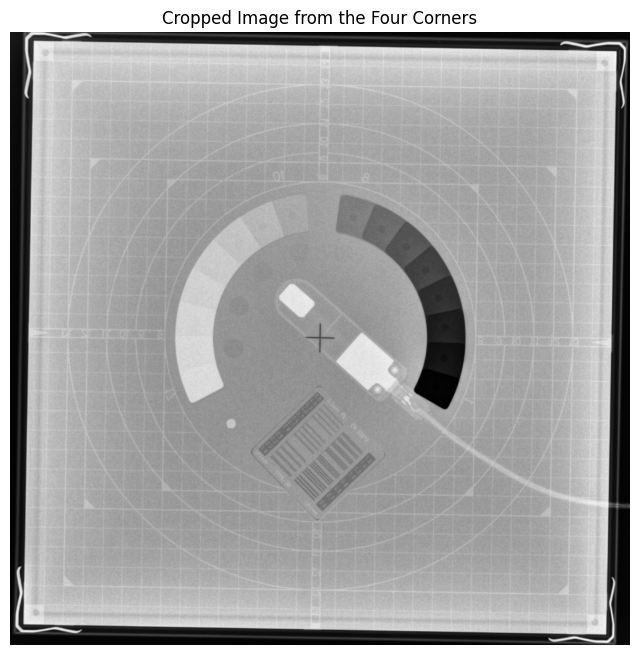

In [5]:
# Get the coordinates for the bounding box
top_left = corner_points['top_left']
top_right = corner_points['top_right']
bottom_left = corner_points['bottom_left']
bottom_right = corner_points['bottom_right']

# Calculate bounding box edges
left_edge = min(top_left[0], bottom_left[0])
right_edge = max(top_right[0], bottom_right[0])
top_edge = min(top_left[1], top_right[1])
bottom_edge = max(bottom_left[1], bottom_right[1])

# Crop the image using NumPy slicing
cropped_image = input_image[top_edge:bottom_edge, left_edge:right_edge]

# Display the cropped image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image from the Four Corners')
plt.axis('off')
plt.show()


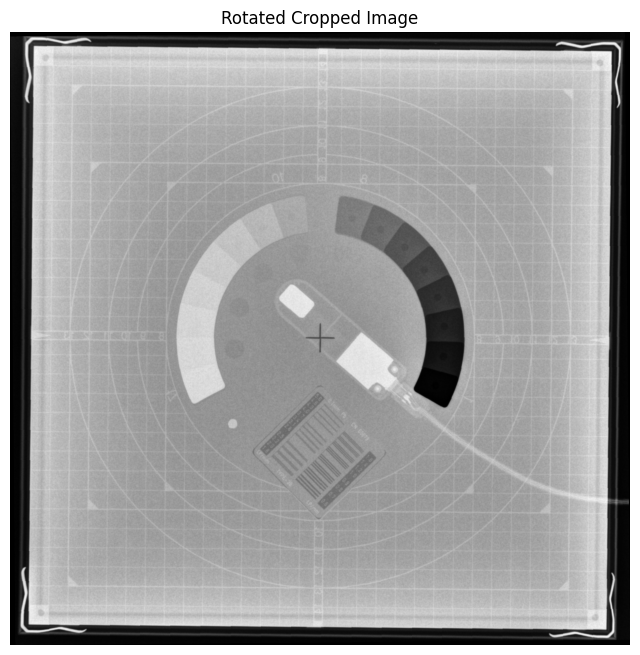

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, degrees, cos, sin

def calculate_rotation_angle(point1, point2):
    delta_y = point2[1] - point1[1]
    delta_x = point2[0] - point1[0]
    angle = atan2(delta_y, delta_x)
    return degrees(angle)

def rotate_image(image, angle):
    (height, width) = image.shape[:2]
    center = (width // 2, height // 2)

    angle_rad = np.deg2rad(angle)
    cos_theta = cos(angle_rad)
    sin_theta = sin(angle_rad)

    new_width = int(abs(height * sin_theta) + abs(width * cos_theta))
    new_height = int(abs(height * cos_theta) + abs(width * sin_theta))

    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)
    offset_x = (new_width - width) // 2
    offset_y = (new_height - height) // 2

    for y in range(new_height):
        for x in range(new_width):
            x_orig = (x - offset_x - center[0]) * cos_theta + (y - offset_y - center[1]) * sin_theta + center[0]
            y_orig = -(x - offset_x - center[0]) * sin_theta + (y - offset_y - center[1]) * cos_theta + center[1]

            if 0 <= x_orig < width and 0 <= y_orig < height:
                rotated_image[y, x] = image[int(y_orig), int(x_orig)]

    return rotated_image

top_left = corner_points['top_left']
top_right = corner_points['top_right']
bottom_left = corner_points['bottom_left']
bottom_right = corner_points['bottom_right']

# Calculate bounding box edges
left_edge = min(top_left[0], bottom_left[0])
right_edge = max(top_right[0], bottom_right[0])
top_edge = min(top_left[1], top_right[1])
bottom_edge = max(bottom_left[1], bottom_right[1])

# Crop the image using NumPy slicing
cropped_image = input_image[top_edge:bottom_edge, left_edge:right_edge]

# Calculate the rotation angle for the cropped image
rotation_angle = calculate_rotation_angle(top_left, top_right)

# Rotate the cropped image by the calculated angle
rotated_cropped_image = rotate_image(cropped_image, -rotation_angle)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(rotated_cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Cropped Image')
plt.axis('off')
plt.show()


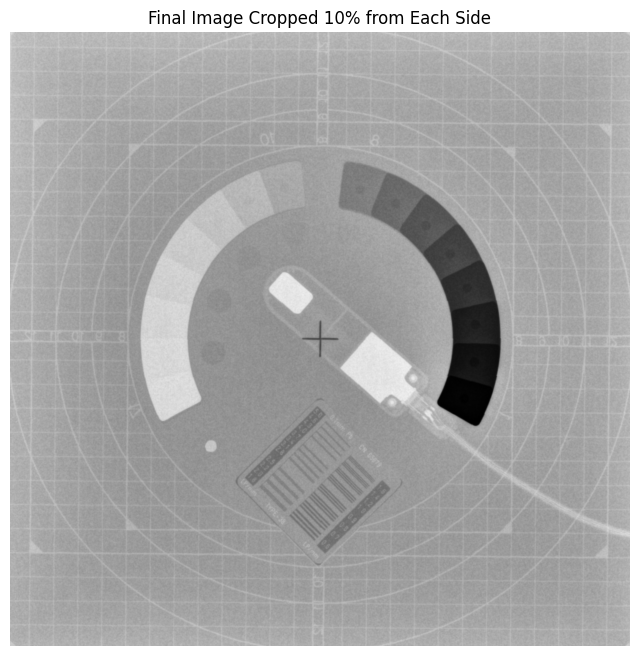

In [7]:
# Calculate the 10% margin to crop from each side
height, width = rotated_cropped_image.shape[:2]
margin_x = int(width * 0.10)
margin_y = int(height * 0.10)

# Crop 10% from each side of the rotated image
cropped_final_image = rotated_cropped_image[margin_y:height - margin_y, margin_x:width - margin_x]

# Display the final cropped image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(cropped_final_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image Cropped 10% from Each Side')
plt.axis('off')
plt.show()


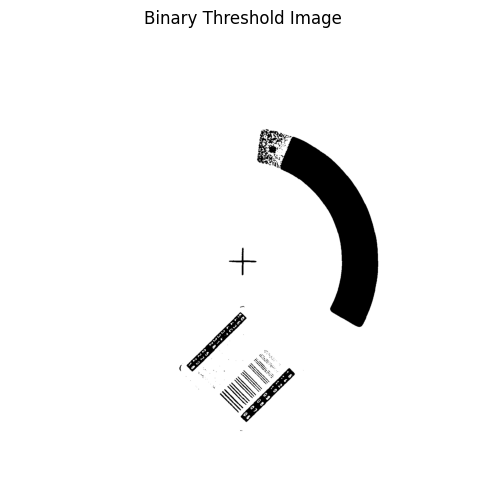

In [9]:
# Convert the thresholded image to grayscale and save it
threshold_value = 125
cropped_binary_image = threshold(cropped_final_image, thresh_value=threshold_value)

# Display the thresholded image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cropped_binary_image, cmap='gray')
plt.title('Binary Threshold Image')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assume `to_grayscale` function is already defined
# def to_grayscale(image):
#     return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Load the new phantom kernel
phantom_kernel_path = 'phantom-kernel.png'
phantom_kernel = cv2.imread(phantom_kernel_path)  # Load in normal RGB
if phantom_kernel is None:
    print("Error: Could not read the phantom kernel image. Please check the path and filename.")
else:
    # Convert phantom kernel to grayscale using the provided function
    phantom_kernel_gray = to_grayscale(phantom_kernel)
    cropped_binary_image

    # Assume `cropped_binary_image` is already defined
    # Perform template matching on the cropped binary image
    template_height, template_width = phantom_kernel_gray.shape
    max_similarity = -1
    best_match_position = None

    # Perform template matching to search for the highest similarity
    step_size = 10
    for y in range(0, cropped_binary_image.shape[0] - template_height + 1, step_size):
        for x in range(0, cropped_binary_image.shape[1] - template_width + 1, step_size):
            region = cropped_binary_image[y:y + template_height, x:x + template_width]

            # Compute match score
            match_score = np.sum(region == phantom_kernel_gray) / (template_height * template_width)

            # Update the best match if current match score is higher
            if match_score > max_similarity:
                max_similarity = match_score
                best_match_position = (x, y)

    # Check if a best match was found
    if best_match_position is not None:
        # Extract the coordinates of the best match
        x_best, y_best = best_match_position

        # Crop the image using the best match coordinates
        cropped_best_match = cropped_final_image[y_best:y_best + template_height, x_best:x_best + template_width]

        # Display the cropped best match region
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(cropped_best_match, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image of the Best Match Region')
        plt.axis('off')
        plt.show()
    else:
        print("No matching regions found.")


ValueError: operands could not be broadcast together with shapes (547,552,3) (547,552) 